In [1]:
import collections
import networkx as nx
import sys
import os
sys.path.append(r'c:\\Users\\rotim\\OneDrive\\Documents\\Reading\\graph-code\\Skoltech-PhD-Thesis\\_codes\\SIR\\Influential-nodes-identification-in-complex-networks-via-information-entropy')
from algorithms import *
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import pickle

In [2]:
graph_collections, graph_name = read_graph("./test-graphs")


{'ABILENE': {'index': 0, 'nodes': 11, 'edges': 14}, 'ABVT': {'index': 1, 'nodes': 23, 'edges': 31}, 'AGIS': {'index': 2, 'nodes': 25, 'edges': 30}, 'ARN.GRAPHML': {'index': 3, 'nodes': 30, 'edges': 29}, 'BELLCANADA': {'index': 4, 'nodes': 48, 'edges': 64}, 'BELLSOUTH.GRAPHML': {'index': 5, 'nodes': 51, 'edges': 66}, 'BICS.GRAPHML': {'index': 6, 'nodes': 33, 'edges': 48}, 'CERNET.GRAPHML': {'index': 7, 'nodes': 41, 'edges': 58}, 'CESNET200706.GRAPHML': {'index': 8, 'nodes': 44, 'edges': 51}, 'CHINANET.GRAPHML': {'index': 9, 'nodes': 42, 'edges': 66}, 'COGENTCO.GRAPHML': {'index': 10, 'nodes': 197, 'edges': 243}, 'COLT.GRAPHML': {'index': 11, 'nodes': 153, 'edges': 177}, 'DELTACOM.GRAPHML': {'index': 12, 'nodes': 113, 'edges': 161}, 'GARR201110.GRAPHML': {'index': 13, 'nodes': 59, 'edges': 74}, 'GEANT2001': {'index': 14, 'nodes': 27, 'edges': 38}, 'GRNET.GRAPHML': {'index': 15, 'nodes': 37, 'edges': 42}, 'INTELLIFIBER.GRAPHML': {'index': 16, 'nodes': 73, 'edges': 95}, 'INTEROUTE.GRAPHML'

In [3]:
# India   145nodes 187edges #37
# US carrier 158nodes   189edges # 41
# Kentucky    754nodes   895edges # 20
# Albeni  # 0
# Geant  2001 #14
# Bell Canada # 4
# Abvt # 1
# Agis # 2
# 10, 18, 8
# selection__= []
# selection__=[i for i,j in enumerate(graph_name)]
def selection__from_graph(graph_coll,graph_name_list,sel_=[]):
    """_summary_

    Args:
        graph_coll (_type_): _description_
        sel_ (list, optional): _description_. Defaults to [].

    Returns:
        _type_: _description_
    """
    if sel_ !=[]:
        return [(j, graph_coll[k]) for i, j in enumerate(graph_name_list)
                for k in sel_ if i == k]
    else:
        return [(i, j) for i, j in zip(graph_name_list, graph_coll)]


In [4]:
G = graph_collections[37]
# geo_loc_data = get_geo_data("Internet2LatLong.csv")
geo_loc_data = {k: {"lat": v.get('Latitude', 0), "long": v.get('Longitude', 0)}
                for (k, v) in G.nodes(data=True)}
# print(geo_loc_data)
edge_geo_data_combined = assign_location(G, geo_loc_data)
# set edge attributes
set_edge_attr(G, edge_geo_data_combined)


[('0',
  {'Internal': 1,
   'Latitude': 25.33333,
   'Country': 'India',
   'id': 0,
   'Longitude': 83.0,
   'label': 'Varanasi'}),
 ('1',
  {'Internal': 1,
   'Latitude': 24.57117,
   'Country': 'India',
   'id': 1,
   'Longitude': 73.69183,
   'label': 'Udaipur'}),
 ('2',
  {'Internal': 1,
   'Latitude': 26.61667,
   'Country': 'India',
   'id': 2,
   'Longitude': 81.36667,
   'label': 'Hadiagarh'}),
 ('3',
  {'Internal': 1,
   'Latitude': 27.56667,
   'Country': 'India',
   'id': 3,
   'Longitude': 80.68333,
   'label': 'Sitapur'}),
 ('4',
  {'Internal': 1,
   'Latitude': 30.32295,
   'Country': 'India',
   'id': 4,
   'Longitude': 78.03168,
   'label': 'Dehradun'}),
 ('5',
  {'Internal': 1,
   'Latitude': 26.85,
   'Country': 'India',
   'id': 5,
   'Longitude': 80.91667,
   'label': 'Lucknow'}),
 ('6',
  {'Internal': 1,
   'Latitude': 26.46667,
   'Country': 'India',
   'id': 6,
   'Longitude': 80.35,
   'label': 'Kanpur'}),
 ('7',
  {'Internal': 1,
   'Latitude': 25.93333,
   'C

In [19]:
selection__= [37,41,20,0,14,4,1,2,10, 18, 8]

gGrahps = selection__from_graph(graph_collections, graph_name, selection__)

# print(gGrahps)

geo_loc_data_sample = {i: {k: {"lat": v.get('Latitude', 0), "long": v.get('Longitude', 0)}
     for (k, v) in g.nodes(data=True)} for i, g in gGrahps}
# print(geo_loc_data_sample)

edge_geo_data_sample = {k: assign_location(u, v) for (k, v), (j,u) in zip(geo_loc_data_sample.items(), gGrahps)}
# print(geo_loc_data_sample)



# print()
# # edge_geo_data_combined_sample = {k: assign_location(g, v) for (k, v), g in zip(geo_loc_data_all.items(), graph_collections)}


In [6]:
weight_sum =sum([sum(hub_information(G, i, 2))
     for (i, j) in sorted(list(G.degree()), key=lambda item: int(item[0]))])
node_strength_2_deg = [(i, sum(hub_information(G, i, 2)))  # /weight_sum
                       for (i, j) in sorted(list(G.degree()), key=lambda item: int(item[0]))]
degree__ = [(i, len(n_neighbor(G, i, 1))) for (i, j) in sorted(list(G.degree()),
                                                               key=lambda item: int(item[0]))]


In [7]:

source_1, source_2, source_3, source_4, *others = degree__, node_strength_2_deg, eccentricity(G),  approximate_current_flow_betweenness_centrality(G, weight="weight"), current_flow_betweenness_centrality(G), betweenness_centrality(G, weight="weight"),  closeness_centrality(G),      load_centrality(
    G),    #eigenvector_centrality(G),

# print(source_2, source_3)


In [8]:
sources_of_evidences = {
    "Degree": {g[0]: [(i, len(n_neighbor(g[1], i, 1))) for (i, j) in sorted(list(g[1].degree()), key=lambda item: int(item[0]))] for g in gGrahps},
    "Node Strength": {g[0]: [(i, sum(hub_information(g[1], i, 2))) for (i, j) in sorted(list(g[1].degree()), key=lambda item: int(item[0]))] for g in gGrahps},
    "Eccentricity": {g[0]: eccentricity(g[1]) for g in gGrahps},
    "Approx Curr. Flow Betwns Cent'y": {g[0]: approximate_current_flow_betweenness_centrality(g[1]) for g in gGrahps}
}
# sources_of_evidences["Degree"]["ABILENE"]

In [9]:
e_v = 2
varying_examples_multi(source_1, source_2, source_3, source_4,e_v)

[('70', 0.9986942454915201),
 ('52', 0.7269206963021477),
 ('118', 0.6606933873804316),
 ('37', 0.04551598153655445)]

In [10]:
evis = [2,3,4]
selected_nodes_based_on_source ={i:{e: varying_examples_multi(sources_of_evidences["Degree"][i],
sources_of_evidences["Node Strength"][i], 
sources_of_evidences["Eccentricity"][i], 
    sources_of_evidences["Approx Curr. Flow Betwns Cent'y"][i], e) for e in evis} for i, j in gGrahps}

selected_nodes_based_on_source_ext = {k2:{k:len(v) for k,v in v2.items()} for k2,v2 in selected_nodes_based_on_source.items()}

# {i: { "#Nodes":  nx.number_of_nodes(j), "#Edges": nx.number_of_edges(j), "sel_":v} for (i,j), v in zip(gGrahps, selected_nodes_based_on_source.values())}
sel_node_summary={i: {"#Nodes":  nx.number_of_nodes(j), "#Edges": nx.number_of_edges(j), "Diameter":nx.diameter(j), "Density":nx.density(j)}for (i, j)in gGrahps }
sel_to_table = {
    i: (sel_node_summary[i] | selected_nodes_based_on_source_ext[i]) for i, j in gGrahps}
    


In [11]:
pd.DataFrame.from_dict(
    sel_to_table, orient='index')
# print()


,#Nodes,#Edges,Diameter,Density,2,3,4
ABILENE,11,14,5,0.254545,5,4,4
ABVT,23,31,7,0.122530,10,11,11
AGIS,25,30,7,0.100000,6,11,9
BELLCANADA,48,64,13,0.056738,11,16,18
CESNET200706.GRAPHML,44,51,6,0.053911,4,17,28
COGENTCO.GRAPHML,197,243,28,0.012587,8,21,29
GEANT2001,27,38,6,0.108262,5,19,19
ION.GRAPHML,125,146,25,0.018839,21,36,40
KDL,754,895,58,0.003153,47,178,175
TATANLD.GRAPHML,145,186,28,0.017816,4,122,7


In [12]:
selected_nodes_based_on_source["ABILENE"]
# {i:{varying_examples_multi(j,v2) for i,j in gGrahps for v2 in v} for v in selected_nodes_based_on_source.values()}
# varying_examples_multi(j)
# cluster_optimal_nodes()
# selected_nodes_based_on_source["BELLCANADA"][4]
# sel_error ={k2: {k: cluster_optimal_nodes(j, v) for k, v in v2.items() for i, j in gGrahps if {i, k2} } for k2, v2 in selected_nodes_based_on_source.items()}
clusters__ = {
    k2: {
        k: cluster_optimal_nodes_test(j, v) for k, v in v2.items()
        }  
        for (i, j), (k2, v2) in zip(
            tqdm(gGrahps), tqdm(selected_nodes_based_on_source.items())
            )
            }

# clusters__ = {
#     k2:{
#         k: cluster_optimal_nodes_test(j, v) for k, v in v2.items()
#     }
#     for (i, j), (k2, v2) in zip(
#         tqdm(gGrahps), 
#         tqdm(selected_nodes_based_on_source.items())
#     )
# }


 91%|█████████ | 10/11 [00:13<00:01,  1.36s/it]


In [187]:
# gGrahps[0][1]
cluster_optimal_nodes(gGrahps[0][1], selected_nodes_based_on_source["ABILENE"][2])


{'1': {'7', '15', '16', '22', '6', '4'}, '5': {'0', '12'}, '8': {'9'}, '11': {'21', '13', '18', '17'}, '10': {'19', '14', '2', '20', '3'}}


In [183]:
[{x:cluster_optimal_nodes_test(
    gGrahps[1][1], selected_nodes_based_on_source["ABILENE"][x])}for x in [2, 3, 4]]


[{2: {'1': {'6', '4'}, '22': {'15'}, '0': {'2', '7'}, '5': {'12'}, '10': {'20', '3', '13', '14'}, '8': {'9'}, '11': {'21'}, '18': {'16', '19', '17'}}}, {3: {'1': {'7', '15', '16', '22', '6', '4'}, '5': {'0', '12'}, '8': {'9'}, '11': {'21', '13', '18', '17'}, '10': {'19', '14', '2', '20', '3'}}}, {4: {'1': {'7', '15', '16', '22', '6', '4'}, '5': {'0', '12'}, '8': {'9'}, '11': {'21', '13', '18', '17'}, '10': {'19', '14', '2', '20', '3'}}}]


In [20]:

clusters__dict = { c: {e: {i: set([i]) | j for i, j in f.items()} for e, f in d.items()} for c, d in clusters__.items()}

clusters__pair ={x: {e: {u: k for (k, v) in f.items() for u in v} for e, f in y.items()} for x, y in clusters__dict.items()}
# clusters__pair
# https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.set_node_attributes.html



In [22]:

# list(gGrahps[0][1].nodes.data())
# gGrahps[0][1].edges(data=True)


In [170]:
#Generate 1000 random numbers between 1 and 16777215
max_node_len = max([nx.number_of_nodes(j) for i,j in gGrahps])
def random_hex_numbers(len_of_hexs):
    range__ = list(range(0, len_of_hexs))
    randomlist = random.sample(range(1, 16777215), len_of_hexs)
    # print(randomlist)
    random_dict = {str(i):"#"+format(j, "x") for i,j in zip(range__,randomlist)}
    # print(random_dict)
    return random_dict


rand_hex = random_hex_numbers(max_node_len)


def color_generator(no_colors):
    colors = []
    while len(colors) < no_colors:
        random_number = np.random.randint(0, 16777215)
        hex_number = format(random_number, 'x')
        if len(hex_number) == 6:
            hex_number = '#' + hex_number
            colors.append(hex_number)
    return {str(i):v for i,v in enumerate(colors)}

color_generator(7)


{'0': '#4ab2e6',
 '1': '#4be865',
 '2': '#b28a4d',
 '3': '#1d1256',
 '4': '#dd5ff2',
 '5': '#e02a32',
 '6': '#e8f364'}

[1.0, 0.25, 0.25, 0.5714285714285714, 0.25, 0.25, 0.0, 0.25]


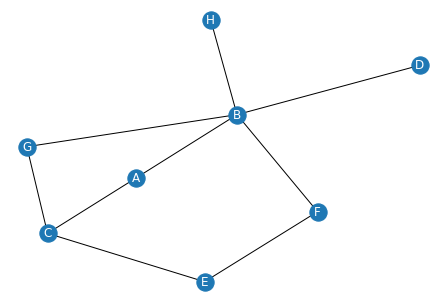

In [64]:
t = nx.Graph()
t.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])

val_map = {'A': 1.0,
           'D': 0.5714285714285714,
           'H': 0.0}

values = [val_map.get(node, 0.25) for node in t.nodes()]
# 
print(values)
#  node_color=values,
nx.draw(t, cmap=plt.get_cmap('viridis'), with_labels=True, font_color='white')
plt.show()


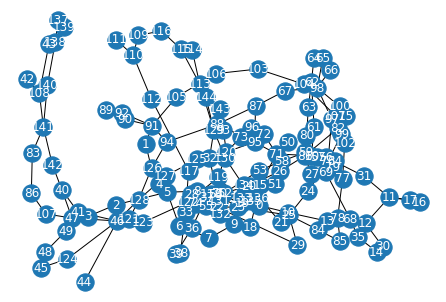

In [28]:
[nodes for nodes in G.nodes()]
nx.draw(G, cmap=plt.get_cmap('viridis'), with_labels=True, font_color='white')


In [30]:
f = nx.path_graph(3)
bb = nx.betweenness_centrality(f)
print(bb)
isinstance(bb, dict)
# True
nx.set_node_attributes(f, bb, "betweenness")
f.nodes[1]["betweenness"]
# 1.0

{0: 0.0, 1: 1.0, 2: 0.0}


1.0

In [129]:
clusters__pair
gGrahps[8]
len("#000000")


7

In [149]:
def get_random_hex():
    random_number = random.randint(0, 16777215)

    # convert to hexadecimal
    hex_number = str(hex(random_number))

    # remove 0x and prepend '#'
    return'#' + hex_number[2:]


In [163]:
str(hex(random.randint(0, 16777215)))


'0x138b24'

In [166]:
{k:get_random_hex() for k in [1,2,3,4,5,6]}

{1: '#ded2e4',
 2: '#7d5f21',
 3: '#6a742c',
 4: '#206e56',
 5: '#5df1ca',
 6: '#7642f3'}

In [176]:
G = graph_collections[1]
__rand = nx.number_of_nodes(G)


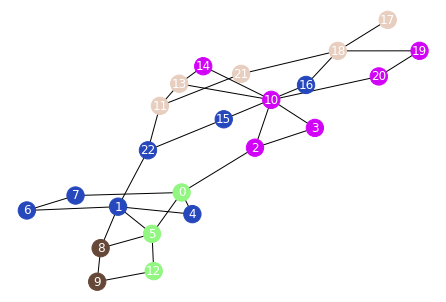

{'1': {'7', '15', '16', '22', '6', '4'}, '5': {'0', '12'}, '8': {'9'}, '11': {'21', '13', '18', '17'}, '10': {'19', '14', '2', '20', '3'}}
None


In [190]:
kdl_cluster_2 = clusters__pair["ABVT"][4]
nx.set_node_attributes(G, kdl_cluster_2, "2 Sources")
list(G.nodes().data())
# isinstance(G.nodes().data(), tuple)
# [{k: v["2 Sources"]for k,v in x.items()} for x in G.nodes().data()]
G.nodes["1"]['2 Sources']
opti_n_maps = {node: j['2 Sources'] for node, j in G.nodes().data()}
# print(opti_n_maps)
# print(nx.number_of_nodes(G))
random_cols = color_generator(__rand)
# random_cols = {node:get_random_hex() for node in G.nodes()}
# print(random_cols)
{(k,v,k1,v1) for (k,v),(k1,v1) in zip(random_cols.items(),opti_n_maps.items())}
values = [val_map.get(node, 0.25) for node in t.nodes()]
values = [random_cols.get(v, "#000000") for k, v in opti_n_maps.items() ]
#  node_color=values,
# print(values)
nx.draw(G, cmap=plt.get_cmap('viridis'), node_color=values, with_labels=True, font_color='white')
plt.show()
print(print(cluster_optimal_nodes_test(
        gGrahps[1][1], selected_nodes_based_on_source["ABVT"][4]))
)
